# Lecture Notes 2: Numpy, Timing, Plotting

# Numpy

## Basics

In [7]:
# Import the module such that we can use the built-in functionality
import numpy

### Numpy arrays

In [8]:
X = numpy.array([1, 2, 3, 4])
Y = numpy.array([5, 6, 7, 8])

### Operations between arrays

In [9]:
A = X + Y            # element-wise addition
M = X * Y            # element-wise multiplication
D = numpy.dot(X, Y)  # dot product
T = X.T              # transposing
X_tail = X[2:]       # indexing (similar to lists)

A, M, D, T, X_tail

(array([ 6,  8, 10, 12]),
 array([ 5, 12, 21, 32]),
 70,
 array([1, 2, 3, 4]),
 array([3, 4]))

In [10]:
# Compare this to operations on lists
X_list = [1, 2, 3, 4]
Y_list = [5, 6, 7, 8]
print(X_list + Y_list)
print(X_list * Y_list) #  -> raises Exception

[1, 2, 3, 4, 5, 6, 7, 8]


TypeError: can't multiply sequence by non-int of type 'list'

### Equivalent operations with lists

In [11]:
A_list = [x + y for x, y in zip(X, Y)]      # element-wise addition
M_list = [x * y for x, y in zip(X, Y)]      # element-wise multiplication
D_list = sum([x * y for x, y in zip(X, Y)]) # dot product

A_list, M_list, D_list

([6, 8, 10, 12], [5, 12, 21, 32], 70)

**Observation:** Results are the same, but the Numpy syntax is much more readable (i.e. more compact) than the Python syntax for the same vector operations.

### Shapes of arrays

In [12]:
print(A.shape, M.shape, D.shape)

(4,) (4,) ()


## Matrices

In [13]:
A = numpy.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

In [14]:
print(A)
print(10 * "-")
print(A.shape)

[[1 2 3]
 [4 5 6]]
----------
(2, 3)


In [15]:
# Elementwise multiplication
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [16]:
# Matrix-matrix multiplication
numpy.dot(A, A.T)

array([[14, 32],
       [32, 77]])

**Observation:** Unlike Matlab, "*" denotes an element-wise multiplication. Matrix multiplication is instead implemented by the function "dot".

In [17]:
numpy.dot(A, A)  # -> raises Exception

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

## Performance evaluation

To verify that in addition to the more compact syntax, Numpy also provides a computational benefit over standard Python, we compare the running time of a similar computation performed in pure Python and in Numpy. The module "time" provides a function "clock" to measure the current time.

In [18]:
import time
time.clock()

c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1177.556024098

we now wait a little bit...

In [19]:
time.clock()

c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


1179.012459851

and can observed that the value is higher than before (time has passed). We now define two functions to test the speed of matrix multiplication for two $n \times n$ matrices.

In [57]:
# pure Python implementation

def benchmark_python(n):
    
    # initialization
    X = numpy.ones((n, n))
    Y = numpy.ones((n, n))
    Z = numpy.zeros((n, n))
    
    # actual matrix multiplication
    start = time.clock()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                Z[i,j] += X[i, k] * Y[k, j]
    end = time.clock()
    
    return end-start

In [21]:
# Numpy implementation

def benchmark_numpy(n):
    
    # initialization
    X = numpy.ones((n, n))
    Y = numpy.ones((n, n))
    Z = numpy.zeros((n, n))
    
    # actual matrix multiplication
    start = time.clock()
    Z = numpy.dot(X, Y)
    end = time.clock()
    
    return end-start

Evaluating this function for $n=100$ iterations, we can observe that Numpy is much faster than pure Python.

In [22]:
num_iterations = 100
benchmark_python(num_iterations), benchmark_numpy(num_iterations)

c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


(0.7318625189998329, 0.04467595099981736)

In [23]:
### Common alternative way of importing Numpy: alias "np"
import numpy as np
print(np.ones((3, 3)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# Plotting

In machine learning, it is often necessary to visualize the data, or to plot properties of algorithms such as their accuracy or their speed. For this, we can make use of the matplotlib library, which we load with the following sequence of commands.

In [24]:
import matplotlib
import matplotlib.pyplot as plt
# Needed in Jupyter Notebook
%matplotlib inline

## Basic plot

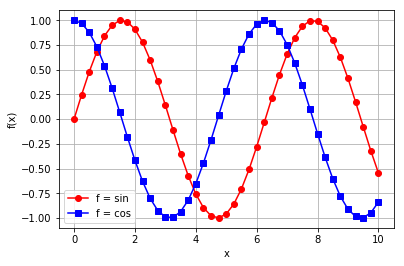

In [25]:
x = numpy.arange(0, 10.001, 0.25)
y = numpy.sin(x)
z = numpy.cos(x)

plt.plot(x, y, 'o-', color='red', label='f = sin')
plt.plot(x, z, 's-', color='blue', label='f = cos')

plt.legend()

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

**Plotting a performance curve for matrix multiplication**

We run the computation with different parameters (e.g. size of input arrays)

In [26]:
N = [1, 2, 4, 8, 16, 32, 64, 128, 256]

py_t = [benchmark_python(n) for n in N]
np_t = [benchmark_numpy(n) for n in N]

c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
c:\users\ahmed zaky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


Then, we render the plot

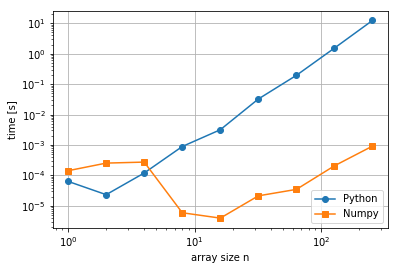

In [27]:
plt.plot(N, py_t, 'o-', label='Python')
plt.plot(N, np_t, 's-', label='Numpy')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('array size n')
plt.ylabel('time [s]')
plt.legend(loc='lower right')

## Advanced Numpy

**Special Array Initializations**

Numpy arrays can be initialized to specific values (`numpy.zeros`, `numpy.ones`, ...). Special numpy arrays (e.g. diagonal, identity) can be created easily.

In [28]:
A = numpy.zeros((3, 3))         # array of size 2x2 filled with zeros
B = numpy.ones((3, 3))          # same, but filled with ones
C = numpy.diag((1.0, 2.0, 3.0)) # diagonal matrix
D = numpy.eye(3)                # identity matrix
E = numpy.random.rand(3, 3)     # random numbers
F = numpy.tril(B)               # upper triagonal matrix

print(A)
print(B)
print(C)
print(D)
print(E)
print(F)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.87971312 0.78391776 0.19768575]
 [0.19956348 0.3128877  0.28486261]
 [0.41169863 0.90697899 0.95295082]]
[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]


**Array type**

In [29]:
A = numpy.ones((2, 2))
type(A), A.shape, A.size, A.ndim, A.dtype

(numpy.ndarray, (2, 2), 4, 2, dtype('float64'))

In [30]:
A = numpy.ones((3,3,3))
type(A), A.shape, A.size, A.ndim, A.dtype

(numpy.ndarray, (3, 3, 3), 27, 3, dtype('float64'))

**Casting**

An array can be explicitly forced to have elements of a certain type (e.g. half-precision). When applying an operator to two arrays of different types, the returned array retains the type of the highest-precision input array (here, float64).

In [31]:
E = A.astype('float32')
A.dtype, E.dtype, (A + E).dtype

(dtype('float64'), dtype('float32'), dtype('float64'))

**Reshaping and transposing**

In [32]:
A = numpy.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.reshape((3,2)))
print(A.ravel())
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]
[[1 4]
 [2 5]
 [3 6]]


**Broadcasting**

See also https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

![Numpy broadcasting](numpy_broadcasting.png)

In [33]:
numpy.ones((3, 2)) + 1

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [34]:
numpy.ones((3, 2)) + numpy.ones((3, 2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [35]:
numpy.ones((3, 1)) +  numpy.ones((1, 2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [36]:
numpy.ones((3, 1)) + numpy.ones((2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

**Indexing**

See also https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [37]:
A = numpy.arange(30).reshape(6, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


Select rows/columns

In [38]:
print(A[3, :])
print(A[:, 3])

[15 16 17 18 19]
[ 3  8 13 18 23 28]


Select window

In [39]:
print(A[1:5, 1:4])

[[ 6  7  8]
 [11 12 13]
 [16 17 18]
 [21 22 23]]


Select even rows and odd columns

In [40]:
print(A[::2, 1::2])

[[ 1  3]
 [11 13]
 [21 23]]


Select last two columns

In [41]:
print(A[:, -2:])

[[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]
 [28 29]]


Select column 1 and 4

In [42]:
print(A[:, [1, 4]])

[[ 1  4]
 [ 6  9]
 [11 14]
 [16 19]
 [21 24]
 [26 29]]


## Boolean Arrays

In [43]:
a = numpy.random.rand(4, 4)
print(a)
b = a > 0.5
print(b)
print(b.astype(int))
print(a[b])

[[0.10330638 0.53258494 0.17236052 0.69288191]
 [0.94613179 0.43152706 0.13503595 0.76388787]
 [0.11667594 0.52438814 0.6222651  0.90828459]
 [0.02121717 0.56446806 0.44542657 0.55477909]]
[[False  True False  True]
 [ True False False  True]
 [False  True  True  True]
 [False  True False  True]]
[[0 1 0 1]
 [1 0 0 1]
 [0 1 1 1]
 [0 1 0 1]]
[0.53258494 0.69288191 0.94613179 0.76388787 0.52438814 0.6222651
 0.90828459 0.56446806 0.55477909]


In [44]:
# Is any/all of the elements True?
numpy.any(b), numpy.all(b)

(True, False)

# Analyzing a Dataset
Let's load the Boston dataset (506 examples composed of 13 features each).

In [46]:
# extract two interesting features of the data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

X = boston['data']
F = boston['feature_names']

print(F)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Reduce-type operations**

In [47]:
print(X.mean())                              # Global dataset mean feature value
print(X[:, 0].mean())                        # Mean of first feature (CRIM)
print(X.mean(axis=0), X.mean(axis=0).shape)  # Mean of all features
print(X.std(axis=0), X.std(axis=0).shape)    # Standard deviation of all features
print(X.min(), X.max())                      # Extreme values
print(X.shape, X.sum(axis=1).shape, X.sum(axis=1, keepdims=True).shape)

70.07396704469443
3.613523557312254
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01] (13,)
[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00] (13,)
0.0 711.0
(506, 13) (506,) (506, 1)


In [48]:
# Show the feature name along with the mean and standard deviation
list(zip(F, X.mean(axis=0), X.std(axis=0)))

[('CRIM', 3.6135235573122535, 8.593041351295769),
 ('ZN', 11.363636363636363, 23.299395694766027),
 ('INDUS', 11.136778656126504, 6.853570583390873),
 ('CHAS', 0.0691699604743083, 0.25374293496034855),
 ('NOX', 0.5546950592885372, 0.11576311540656153),
 ('RM', 6.284634387351787, 0.7019225143345692),
 ('AGE', 68.57490118577078, 28.121032570236885),
 ('DIS', 3.795042687747034, 2.103628356344459),
 ('RAD', 9.549407114624506, 8.698651117790645),
 ('TAX', 408.2371541501976, 168.3704950393814),
 ('PTRATIO', 18.455533596837967, 2.162805191482142),
 ('B', 356.67403162055257, 91.20460745217272),
 ('LSTAT', 12.653063241106723, 7.134001636650485)]

**Retain two interesting features (5 and 12)**

In [49]:
X = X[:, [5, 12]]
print(X.shape)

(506, 2)


**Scatter-plot the first two dimensions**

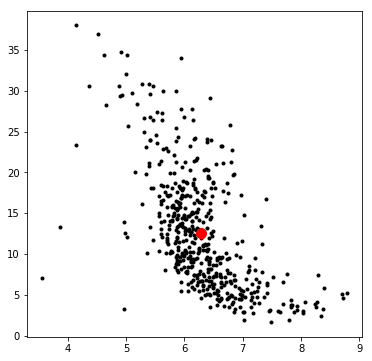

In [50]:
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], 'o', color='black', ms=3)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), 'o', color='red', ms=10)

**Normalize the data**

In [61]:
X_norm = X - X.mean(axis=0) # center around origin
X_norm /= X.std(axis=0)  # rescale features so that they have standard deviation 1 in each dimension

[[ 0.41367189 -1.0755623 ]
 [ 0.19427445 -0.49243937]
 [ 1.28271368 -1.2087274 ]
 ...
 [ 0.98496002 -0.98304761]
 [ 0.72567214 -0.86530163]
 [-0.36276709 -0.66905833]]


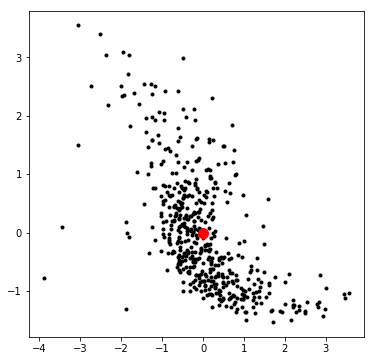

In [52]:
plt.figure(figsize=(6, 6))
plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', color='black', ms=3)
plt.plot(X_norm[:, 0].mean(), X_norm[:, 1].mean(), 'o', color='red', ms=10)

**Computing a distance matrix**

In [53]:
import scipy
import scipy.spatial

D = scipy.spatial.distance.cdist(X_norm, X_norm)

alternative way of computing a distance matrix:

In [54]:
Dalt = np.sqrt(((X_norm ** 2).sum(axis=1).reshape((1, len(X_norm))) \
      + (X_norm ** 2).sum(axis=1).reshape((len(X_norm), 1)) \
      - 2 * numpy.dot(X_norm, X_norm.T)) + 1e-7)
        
print(((Dalt - D) ** 2).mean())

1.9764174161180842e-10


**Highlighting nearby data points**

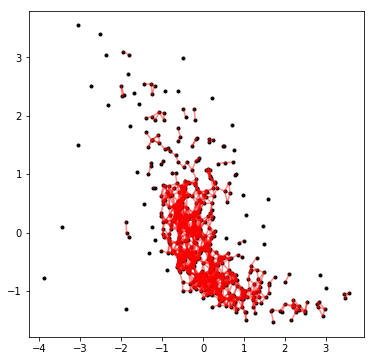

In [55]:
plt.figure(figsize=(6, 6))

ind = numpy.where(D < 0.2)

plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', color='black', ms=3)

for i1,i2 in zip(*ind):
    plt.plot([X_norm[i1, 0], X_norm[i2, 0]], [X_norm[i1, 1], X_norm[i2, 1]], color='red', alpha=0.25)

## Getting help

In [56]:
help(numpy.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are